In [1]:
import site
import sys
site.addsitedir('/home/aneeshs/Packages')
sys.path.append('/home/aneeshs/Packages/illustris_python')
sys.path.append('/home/aneeshs/Packages/arepo_python_tools')
import numpy as np
import illustris_python as il
import arepo_python_tools as ap
import simulation_paths as paths
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']=200
# %config InlineBackend.figure_format = 'svg'

Let's make a 2D stellar density projection of two merging MW type galaxies.<br><br>
Lets choose a box size of 140 kpc/h x 140 kpc/h and a slice thickness of 20 kpc/h. By default box center will be center of simulation volume <br><br>
Set particle type = '234' to include stellar bulge and disk as well as newly formed stars.<br><br> 

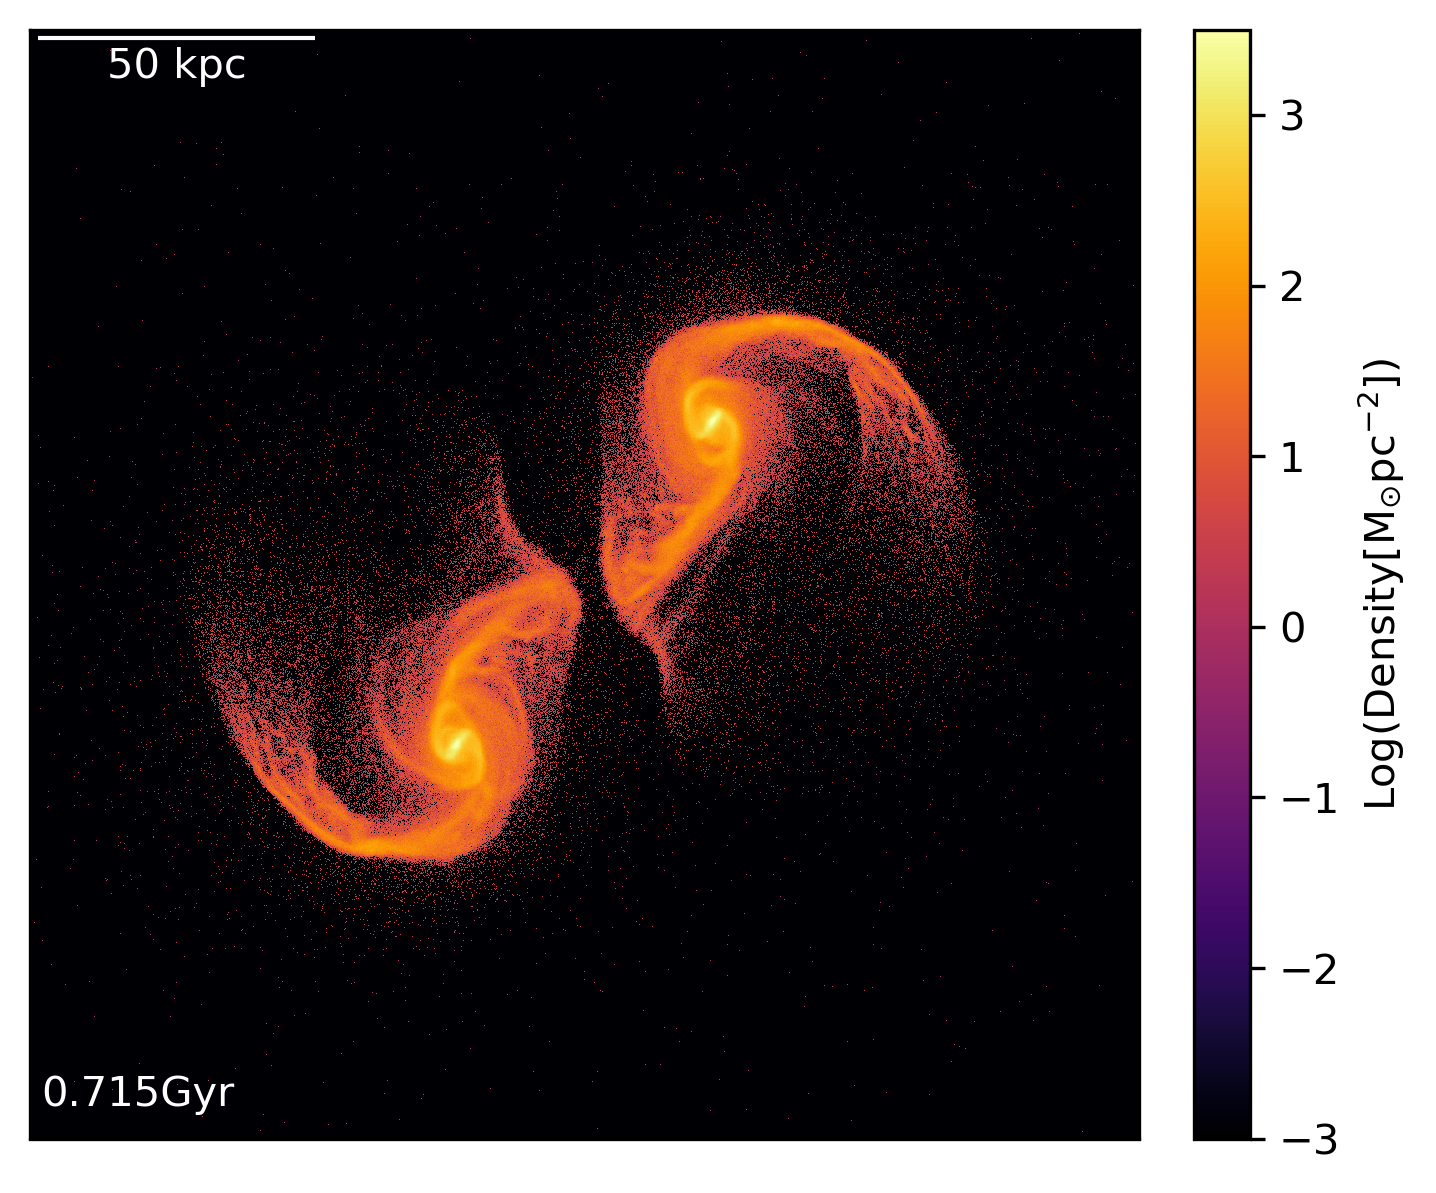

In [2]:
ap.galaxy2Dplots(paths.mergermw_LR10_10c_DF,100,'234','Density','xy',20,140,140,2000,fill=0,showBH=False, smooth=False)

To calculate the centers of the galaxies, use the get_iter_com() <br><br>
It calculates c.o.m from a guess value and a radius by iteratively calculating c.o.m inside the sphere and shrinking to the half mass radius after each iteration. <br><br>
Guess the two centers and choose a large radius (here 75 kpc/h). <br><br>
The guessed centers are shown in cyan triangles and final c.o.m are shown in brown circles

In [3]:
center1 = [360,360,400]; center2 = [430,430,400]

Iterations = 15, delta_r = 0.017054599085416892 R=0.07333727992434133
Iterations = 15, delta_r = 0.015485888246830731 R=0.08575986112318744


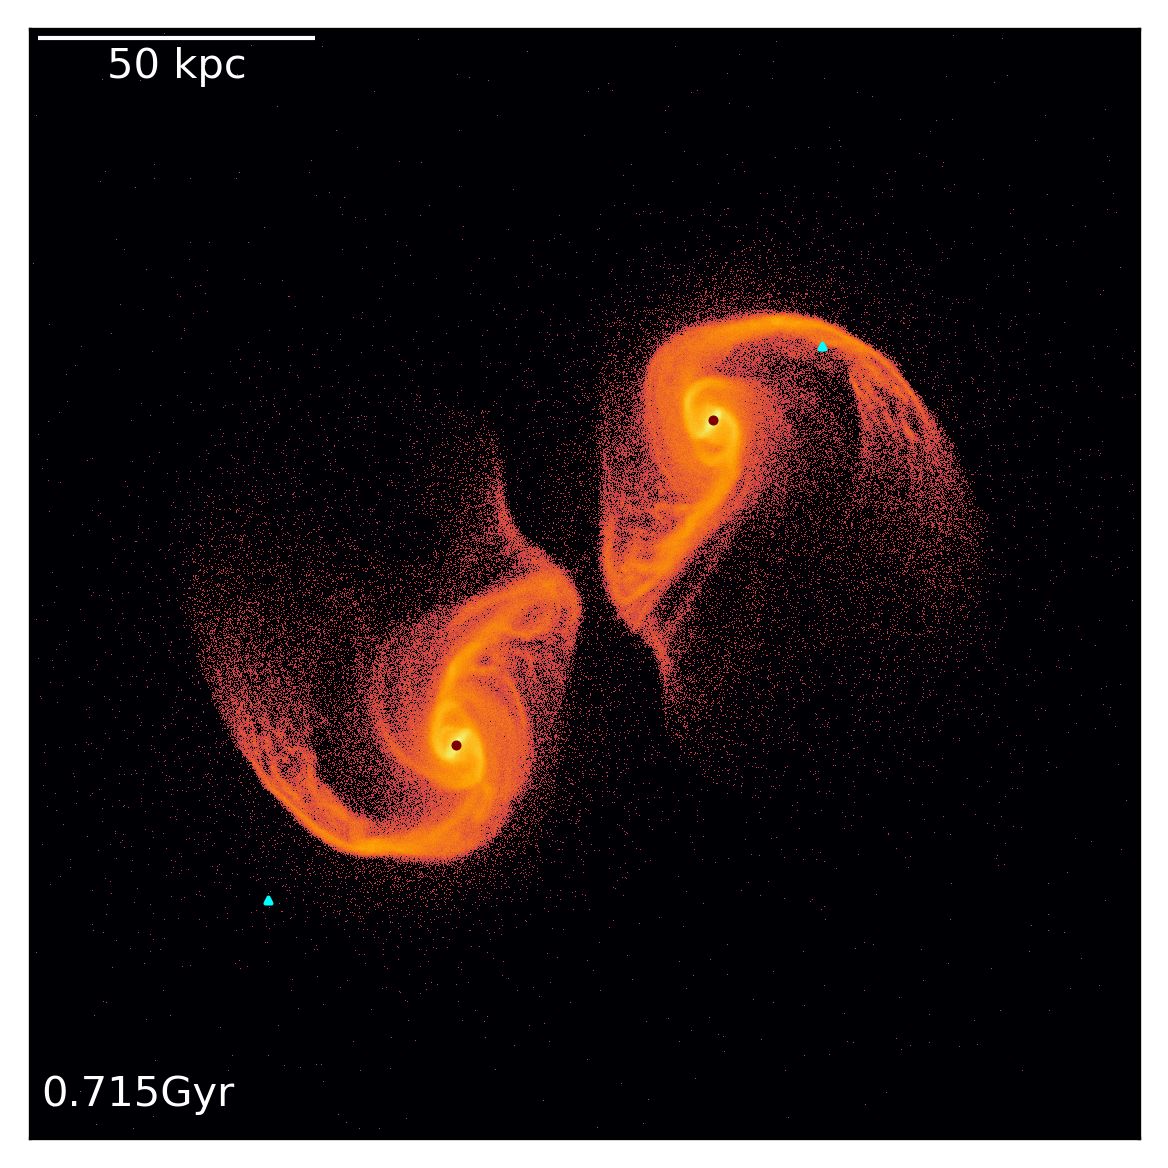

In [17]:
fig,ax=plt.subplots()
boxsize = il.snapshot.loadHeader(paths.mergermw_LR10_10c_DF,100).get('BoxSize')
ap.galaxy2Dplots(paths.mergermw_LR10_10c_DF,100,'234','Density','xy',20,140,140,2000,fill=0,showBH=False,smooth=False,axis=ax,dpi=300)
ax.scatter([center1[0]-boxsize/2,center2[0]-boxsize/2],[center1[1]-boxsize/2,center2[1]-boxsize/2],s=2,color='cyan',marker='^')
com1 = ap.get_iter_com(paths.mergermw_LR10_10c_DF,100,center1,75)
com2 = ap.get_iter_com(paths.mergermw_LR10_10c_DF,100,center2,75)
ax.scatter([com1[0]-boxsize/2,com2[0]-boxsize/2],[com1[1]-boxsize/2,com2[1]-boxsize/2],s=2,color='maroon')

Let's zoom into the galaxy. Set the center of the box to be the calculated c.o.m

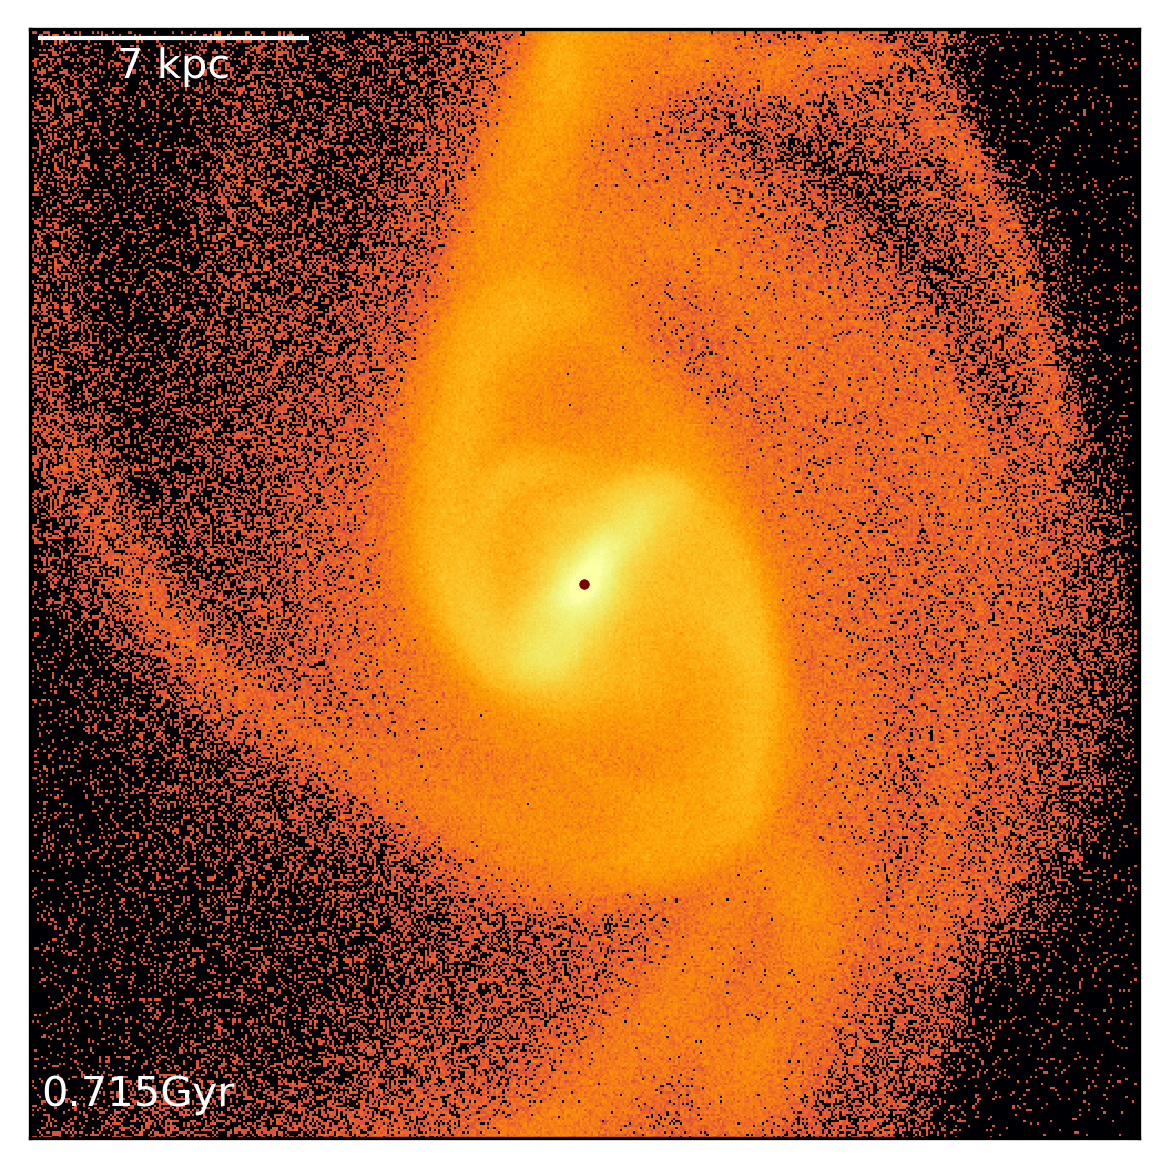

In [16]:
fig,ax=plt.subplots()
boxsize = il.snapshot.loadHeader(paths.mergermw_LR10_10c_DF,100).get('BoxSize')
ap.galaxy2Dplots(paths.mergermw_LR10_10c_DF,100,'234','Density','xy',10,20,20,500,fill=0,showBH=False,smooth=False,axis=ax,dpi=300,centre=com1)
ax.scatter([0,0],[0,0],s=2,color='maroon')

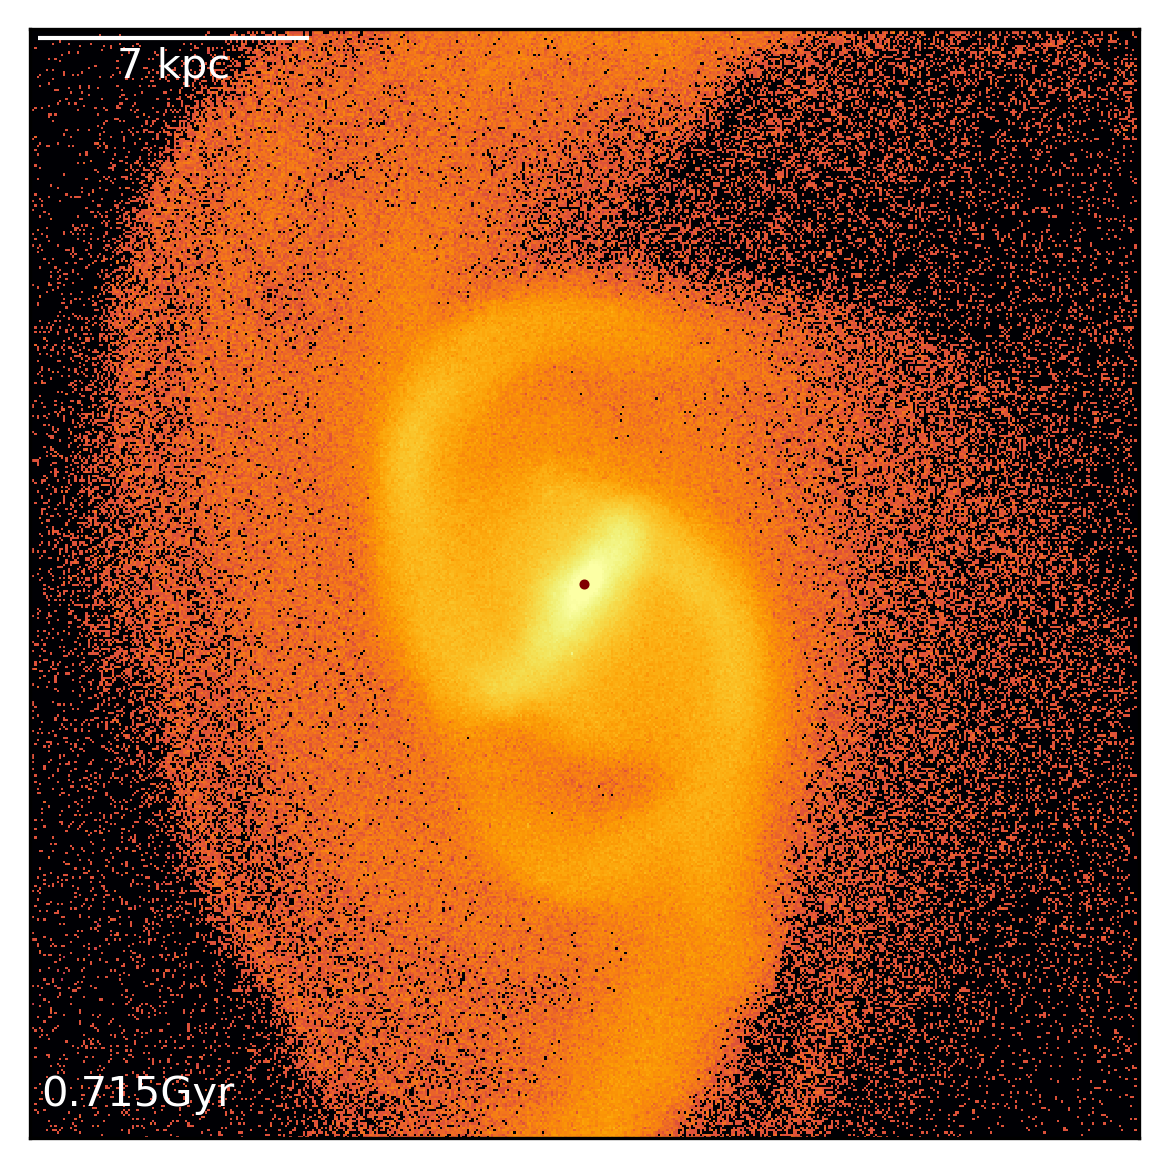

In [21]:
fig,ax=plt.subplots()
ap.galaxy2Dplots(paths.mergermw_LR10_10c_DF,100,'234','Density','xy',10,20,20,500,fill=0,showBH=False,smooth=False,axis=ax,dpi=300,centre=com2)
ax.scatter([0],[0],s=2,color='maroon')

Load the Black Hole positions to check how well it is centered in the galaxy. Use BHs are guess centers for calculating c.o.m

In [4]:
bhpos = ap.bhprop_snap(paths.mw_LR10_10c_DFD)
com = ap.get_iter_com_vs_time(paths.mw_LR10_10c_DFD, 10, 0)

Iterations = 12, delta_r = 0.0010574103223432376 R=0.07234542530227196
Iterations = 12, delta_r = 0.0034389173855081906 R=0.0846854277861166
Iterations = 12, delta_r = 0.001900490715718034 R=0.08417924647501204
Iterations = 12, delta_r = 0.001262905280350906 R=0.08365317634625756Iterations = 12, delta_r = 0.0056558633770582315 R=0.08500888163767295

Iterations = 12, delta_r = 0.0022654087349730963 R=0.08469651413052649
Iterations = 12, delta_r = 0.000656122845088685 R=0.08385303256058788
Iterations = 12, delta_r = 0.0032947657928784294 R=0.0835990312518875
Iterations = 12, delta_r = 0.0006722859190760385 R=0.082526331445443
Iterations = 12, delta_r = 0.002825103124278276 R=0.08714714074995368
Iterations = 12, delta_r = 0.0016586820904666124 R=0.08703787239863683
Iterations = 12, delta_r = 0.0036019919048909314 R=0.08688982434020304
Iterations = 12, delta_r = 0.0026434815484470105 R=0.08815967162131999
Iterations = 12, delta_r = 0.0007648907750964107 R=0.0836308663326617
Iterations = 12

In [5]:
r = ap.deltar(com,bhpos[0])

Text(0.5, 0, 't [Gyr/h]')

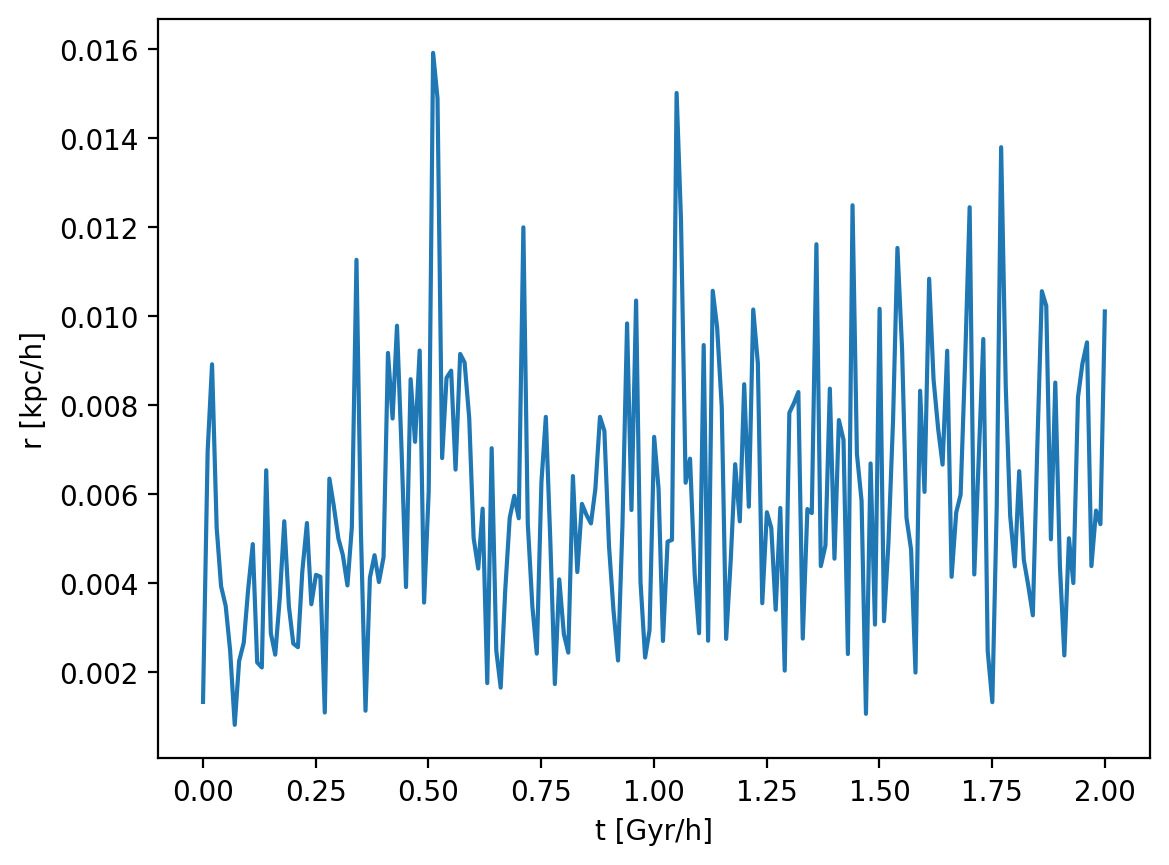

In [7]:
plt.plot(com['time'],r)
plt.ylabel('r [kpc/h]')
plt.xlabel('t [Gyr/h]')